# Experiment 1: Testing on sample data: Sinewave. 

Result: The model fits! 

TODO: 

- [ ] Extract the encoder. 

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
import numpy as np
import matplotlib.pyplot as plt

from tcnAutoencoder import TCNAutoencoder

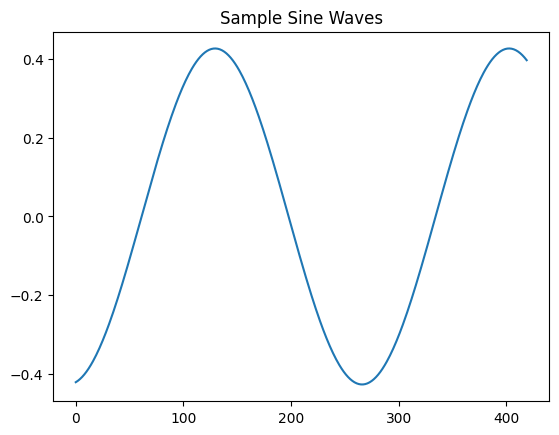

In [7]:

# Check if the model works with a sample sine wave

def generate_sine_wave_pairs(seq_length, num_samples):
    x = np.linspace(0, 2 * np.pi, seq_length)
    data = []
    for _ in range(num_samples):
        intervals = np.random.uniform(1, 4, 2)
        amplitudes = np.random.uniform(0.1, 0.9, 2)
        offset = np.random.uniform(0, 2 * np.pi)
        sample1 = amplitudes[0] * np.sin((x + offset) * intervals[0])
        sample2 = amplitudes[1] * np.sin((x + offset) * intervals[1])
        data.append(np.array([sample1, sample2]))
    return np.array(data)
        

seq_length = 420  # Length of each sine wave sequence
num_samples = 36  # Number of samples

sine_data = generate_sine_wave_pairs(seq_length, num_samples)

# Plot a sample sine wave
plt.plot(np.flip(sine_data[0])[0])
plt.title('Sample Sine Waves')
plt.show()

In [8]:
# Create the dataset
import torch
from torch.utils.data import Dataset

class SineWaveDataset(Dataset):
    def __init__(self, data):
        self.data = torch.tensor(data, dtype=torch.float32)
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx]

dataset = SineWaveDataset(sine_data)

# Create the dataloader
from torch.utils.data import DataLoader

batch_size = 16
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [9]:
model = TCNAutoencoder(input_dim=(seq_length, 2))

# Prefer CUDA
if torch.cuda.is_available():
    device = torch.device("cuda")
# Else, check if metal is available
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")

model.to(device)

print(f"Running on {device}")

Running on mps


In [10]:
def train_model(model, dataloader, num_epochs=300, learning_rate=1e-3):
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.MSELoss()
    for epoch in range(num_epochs):
        model.train()
        for data in dataloader:
            data = data.to(device)
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, data)
            loss.backward()
            optimizer.step()
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

train_model(model, dataloader)


Epoch [1/300], Loss: 0.1861
Epoch [2/300], Loss: 0.2378
Epoch [3/300], Loss: 0.1833
Epoch [4/300], Loss: 0.1643
Epoch [5/300], Loss: 0.1358
Epoch [6/300], Loss: 0.1785
Epoch [7/300], Loss: 0.1120
Epoch [8/300], Loss: 0.2113
Epoch [9/300], Loss: 0.1421
Epoch [10/300], Loss: 0.2035
Epoch [11/300], Loss: 0.1536
Epoch [12/300], Loss: 0.1473
Epoch [13/300], Loss: 0.0959
Epoch [14/300], Loss: 0.0761
Epoch [15/300], Loss: 0.1261
Epoch [16/300], Loss: 0.1263
Epoch [17/300], Loss: 0.1129
Epoch [18/300], Loss: 0.1417
Epoch [19/300], Loss: 0.1918
Epoch [20/300], Loss: 0.0958
Epoch [21/300], Loss: 0.1133
Epoch [22/300], Loss: 0.0848
Epoch [23/300], Loss: 0.1288
Epoch [24/300], Loss: 0.0676
Epoch [25/300], Loss: 0.0866
Epoch [26/300], Loss: 0.1626
Epoch [27/300], Loss: 0.1175
Epoch [28/300], Loss: 0.0431
Epoch [29/300], Loss: 0.1145
Epoch [30/300], Loss: 0.0294
Epoch [31/300], Loss: 0.0868
Epoch [32/300], Loss: 0.0187
Epoch [33/300], Loss: 0.0457
Epoch [34/300], Loss: 0.0446
Epoch [35/300], Loss: 0